## Challenge Set 5
Topic:        Classification  
Date:         07/24/2016  
Name:         Adam Levin  
Worked with:  None

In [367]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18171  100 18171    0     0  40244      0 --:--:-- --:--:-- --:--:-- 40380


In [368]:
import pandas as pd

In [369]:
data = pd.read_csv('data.csv',header=None)

In [370]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?


**Challenge 1**

In [371]:
data = data.replace('n',0)
data = data.replace('y',1)

In [372]:
col_means = [data.loc[data[col]!='?',col].mean() for col in data.columns[1:]]

In [373]:
for col in data.columns[1:]:
    data[col] = data[col].replace('?',col_means[col-1])

In [374]:
col_means[0]

0.44208037825059104

In [375]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.0,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.362319,1.0,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.0,1.0,0.0,0.000000


**Challenge 2**

In [376]:
from sklearn.cross_validation import train_test_split

In [377]:
X_train,X_test,y_train,y_test = train_test_split(data.values[:,1:],data.values[:,0],test_size=.30, random_state=4444)

**Challenge 3**

In [378]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

In [379]:
scores = []
for k in range(1,21):
    knn = KNeighborsClassifier(k,'distance',p=1)
    X_train_normalized = normalize(X_train.astype(float),axis=0)
    X_test_normalized = normalize(X_test.astype(float),axis=0)
    knn.fit(X_train_normalized,y_train)
    scores.append(accuracy_score(y_test,knn.predict(X_test_normalized)))

In [380]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

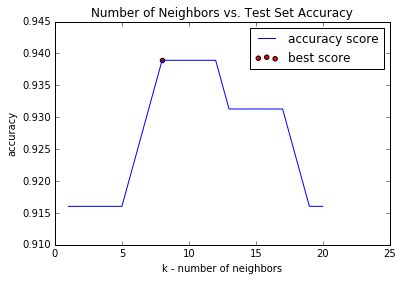

In [381]:
plt.plot(range(1,21),scores,label='accuracy score');
plt.scatter(range(1,21)[np.argmax(scores)],np.max(scores),label='best score',c='r');
plt.xlabel('k - number of neighbors')
plt.ylabel('accuracy')
plt.title('Number of Neighbors vs. Test Set Accuracy')
plt.legend();

In [382]:
print range(1,21)[np.argmax(scores)], np.max(scores)

8 0.93893129771


Best score was with 8 nearest neighbors

**Challenge 4**

In [383]:
from sklearn.linear_model import LogisticRegression

In [384]:
lgr = LogisticRegression(penalty='l2', C=1, fit_intercept=True)
lgr.fit(X_train,y_train)
accuracy_score(y_test,lgr.predict(X_test))

0.93893129770992367

Exactly the same as KNN!

**Challenge 5**

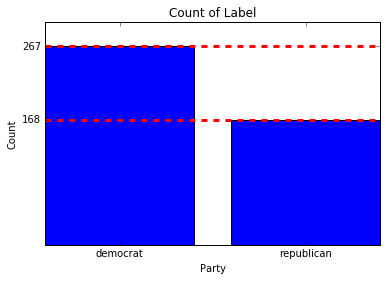

In [385]:
plt.bar([0,1],pd.get_dummies(data[0]).sum(0));
plt.xticks([.4,1.4], pd.get_dummies(data[0]).columns);
plt.yticks(pd.get_dummies(data[0]).sum(0));
plt.axhline(pd.get_dummies(data[0]).sum(0)[0],ls='--',lw=3,color = 'r')
plt.axhline(pd.get_dummies(data[0]).sum(0)[1],ls='--',lw=3,color = 'r')
plt.xlabel('Party');
plt.ylabel('Count');
plt.title('Count of Label');

In [386]:
def simp_predictor_dem(X):
    return ['democrat']*X.shape[0]

In [387]:
accuracy_score(y_test,simp_predictor_dem(X_test))

0.58778625954198471

In [388]:
def simp_predictor_rep(X):
    return ['republican']*X.shape[0]

In [389]:
accuracy_score(y_test,simp_predictor_rep(X_test))

0.41221374045801529

**Challenge 6**

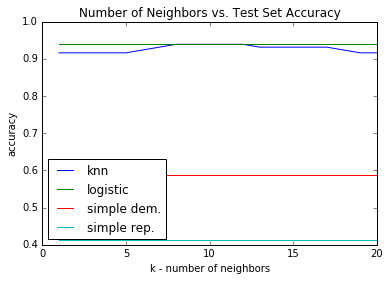

In [390]:
plt.plot(range(1,21),scores,label='knn');
plt.plot(range(1,21),[accuracy_score(y_test,lgr.predict(X_test))]*20,label='logistic');
plt.plot(range(1,21),[accuracy_score(y_test,simp_predictor_dem(X_test))]*20,label='simple dem.')
plt.plot(range(1,21),[accuracy_score(y_test,simp_predictor_rep(X_test))]*20,label='simple rep.')
plt.xlabel('k - number of neighbors')
plt.ylabel('accuracy')
plt.title('Number of Neighbors vs. Test Set Accuracy')
plt.legend(loc=3);

**Challenge 7**

In [391]:
from sklearn.learning_curve import learning_curve

In [392]:
train_sizes_abs,train_scores,test_scores = learning_curve(lgr,data.values[:,1:],data.values[:,0], 
                                            train_sizes=np.linspace(.1,1,20), cv=None, scoring=None)

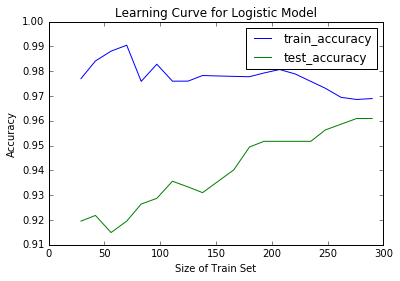

In [393]:
plt.plot(train_sizes_abs,train_scores.mean(1),label='train_accuracy')
plt.plot(train_sizes_abs,test_scores.mean(1),label='test_accuracy');
plt.xlabel('Size of Train Set')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Model')
plt.legend();

In [394]:
knn = KNeighborsClassifier(8,'distance',p=1)
train_sizes_abs,train_scores,test_scores = learning_curve(knn,normalize(data.values[:,1:].astype(float),axis=0)
                                                          ,data.values[:,0], train_sizes=np.linspace(.1,1,20), 
                                                          cv=None, scoring=None)

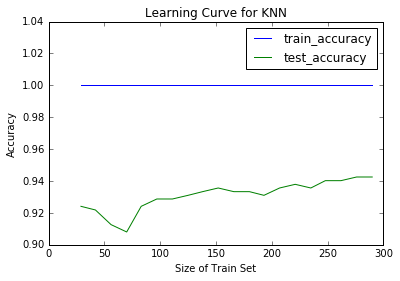

In [395]:
plt.plot(train_sizes_abs,train_scores.mean(1),label='train_accuracy')
plt.plot(train_sizes_abs,test_scores.mean(1),label='test_accuracy');
plt.ylim(.9,1.04)
plt.xlabel('Size of Train Set')
plt.ylabel('Accuracy')
plt.title('Learning Curve for KNN')
plt.legend();

**Challenge 8**

In [396]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
accuracy_score(y_test,gnb.predict(X_test))

0.93893129770992367

In [397]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
accuracy_score(y_test,svc.predict(X_test))

0.95419847328244278

In [398]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
accuracy_score(y_test,dtc.predict(X_test))

0.94656488549618323

In [399]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
accuracy_score(y_test,rfc.predict(X_test))

0.95419847328244278

In [400]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)
accuracy_score(y_test,etc.predict(X_test))

0.95419847328244278

**Challenge 9**

In [401]:
from sklearn.cross_validation import cross_val_score

In [402]:
clfs = [knn,lgr,gnb,svc,dtc,rfc,etc]
res = {}

In [403]:
for clf in clfs:
    s = str(clf).split('(')[0]
    if s=='KNeighborsClassifier':
        res[s] = cross_val_score(clf,normalize(data.values[:,1:].astype(float),axis=0),data.values[:,0],cv=10).mean()
    else:
        res[s] = cross_val_score(clf,data.values[:,1:],data.values[:,0],cv=10).mean()

In [404]:
for s in sorted(res,key=res.get,reverse=True):
    print s, ' '*(30-len(s)),res[s]

RandomForestClassifier          0.958338367059
SVC                             0.958280479211
LogisticRegression              0.958227625088
ExtraTreesClassifier            0.951573039364
GaussianNB                      0.939773985704
KNeighborsClassifier            0.939721131582
DecisionTreeClassifier          0.935341789993


**Challenge 10**

I will impute the '?' before predicting the vote of each senator for each issue.

In [405]:
data = pd.read_csv('data.csv',header=None)
data = data.replace('n',0)
data = data.replace('y',1)

In [406]:
col_modes = [data.loc[data[col]!='?',col].mode().values[0] for col in data.columns[1:]]

In [407]:
col_modes

[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1]

In [408]:
for col in data.columns[1:]:
    data[col] = data[col].replace('?',col_modes[col-1])

In [409]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0


In [410]:
for col in range(1,17):
    print 'With label as col %d, Log. Reg. has a cross. val. score of: ' % col,
    if col<10:
        print '',
    inds = range(1,17)
    inds.remove(col)
    print cross_val_score(lgr,data.values[:,inds].astype(int),data.values[:,col].astype(int),cv=3).mean()

With label as col 1, Log. Reg. has a cross. val. score of:   0.6756145139
With label as col 2, Log. Reg. has a cross. val. score of:   0.627586206897
With label as col 3, Log. Reg. has a cross. val. score of:   0.859770114943
With label as col 4, Log. Reg. has a cross. val. score of:   0.898850574713
With label as col 5, Log. Reg. has a cross. val. score of:   0.926339027975
With label as col 6, Log. Reg. has a cross. val. score of:   0.811489004356
With label as col 7, Log. Reg. has a cross. val. score of:   0.868818340069
With label as col 8, Log. Reg. has a cross. val. score of:   0.896484805542
With label as col 9, Log. Reg. has a cross. val. score of:   0.871085480852
With label as col 10, Log. Reg. has a cross. val. score of:  0.523900216939
With label as col 11, Log. Reg. has a cross. val. score of:  0.666666666667
With label as col 12, Log. Reg. has a cross. val. score of:  0.84367816092
With label as col 13, Log. Reg. has a cross. val. score of:  0.818390804598
With label as c

**Challenge 11**

In [411]:
data = pd.read_csv('./../../challenges_data/2013_movies.csv')

In [412]:
data.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


I'll predict Domestic Total Gross over the median or under the median.

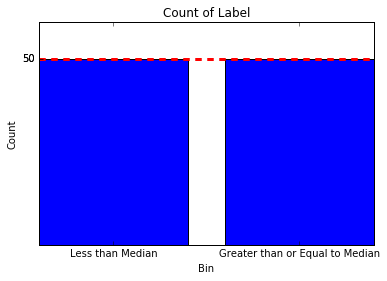

In [413]:
split = data.DomesticTotalGross.median()
plt.bar([0,1],[(data.DomesticTotalGross<split).sum(),(data.DomesticTotalGross>=split).sum()]);
plt.xticks([.4,1.4], ['Less than Median','Greater than or Equal to Median']);
plt.yticks([(data.DomesticTotalGross<split).sum(),(data.DomesticTotalGross>=split).sum()]);
plt.axhline((data.DomesticTotalGross<split).sum(),ls='--',lw=3,color = 'r')
plt.axhline((data.DomesticTotalGross>=split).sum(),ls='--',lw=3,color = 'r')
plt.ylim(0,60)
plt.xlabel('Bin');
plt.ylabel('Count');
plt.title('Count of Label');

First I have to impute Budget. I'll borrow code from a previous challenge to do this.

In [414]:
from sklearn.neighbors import KNeighborsRegressor
mask = data.Budget.isnull().values
X_train = np.hstack((data.values[np.logical_not(mask),:][:,[5]],
                     pd.get_dummies(data.Rating).values[np.logical_not(mask),:]))
X_train = normalize(X_train.astype(float),axis=0)
y_train = data.values[np.logical_not(mask),1]
model = KNeighborsRegressor(n_neighbors=5, weights='distance', leaf_size=30, p=1, n_jobs=1)
model.fit(X_train,y_train);
X_test = np.hstack((data.values[mask,:][:,[5]],
                     pd.get_dummies(data.Rating).values[mask,:]))
data.ix[mask,'Budget'] = model.predict(X_test)

In [415]:
X = np.hstack((data.values[:,1][:,None],pd.get_dummies(data.Rating).values,data.values[:,5][:,None])).astype(float)
y = (data.DomesticTotalGross>=split).astype(float)

As a result of the data being sorted by Gross, all the 0s are first and 1s come later. Therefore regular k-fold won't work. I'll use ShuffleSplit instead.

In [416]:
from sklearn.cross_validation import ShuffleSplit

In [417]:
cross_val_score(lgr,X,y,cv=ShuffleSplit(len(y), n_iter=7, test_size=0.25,random_state=4444)).mean()

0.53714285714285714

In [418]:
scores = []
for k in range(1,21):
    knn = KNeighborsClassifier(k,'distance',p=1)
    scores.append(cross_val_score(knn,X,y,cv=ShuffleSplit(len(y), n_iter=7, test_size=0.25,random_state=4444)).mean())

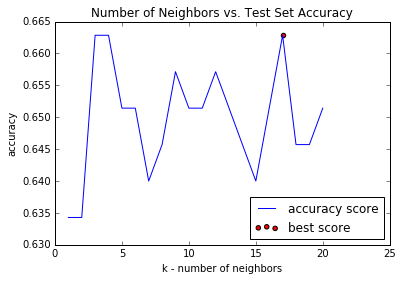

In [419]:
plt.plot(range(1,21),scores,label='accuracy score');
plt.scatter(range(1,21)[np.argmax(scores)],np.max(scores),label='best score',c='r');
plt.xlabel('k - number of neighbors')
plt.ylabel('accuracy')
plt.title('Number of Neighbors vs. Test Set Accuracy')
plt.legend(loc=0);

In [420]:
np.argmax(scores)

16

Best score is with 16 nearest neighbors

In [421]:
knn = KNeighborsClassifier(16,'distance',p=1)

In [422]:
cross_val_score(knn,X,y,cv=ShuffleSplit(len(y), n_iter=7, test_size=0.25,random_state=4444)).mean()

0.65142857142857147

KNN is better than logistic regression in this case.

The stupid prediction is always yes or always no in this case as either has the same accuracy of .5. Logistic regression does only a little better. KNN did significantly better.

X has 6 columns: Budget, G dummy, PG dummy, PG-13 dummy, R dummy, and Runtime.

In [423]:
lgr.fit(X,y).coef_

array([[  3.72663459e-09,   5.12763698e-18,   7.96921527e-18,
         -6.75911156e-18,  -6.86113319e-17,  -3.43016430e-15]])

These coefficients have the following interpretation:
    * The higher the budget, the more likely the gross will be above the median.
    * If the movies has a G rating, it is more likely that the gross will be above the median.
    * If the movies has a PG rating, it is more likely that the gross will be above the median.
    * If the movies has a PG-13 rating, it is less likely that the gross will be above the median.
    * If the movies has a R rating, it is less likely that the gross will be above the median.
    * The coefficient on Rating is basically 0 indicating that there is no significant effect between runtime and whether or not the gross wil be above the median.

**Challenge 12**

In [424]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103  100  3103    0     0   9179      0 --:--:-- --:--:-- --:--:--  9235


In [425]:
data = pd.read_csv('data.csv',header=None)
data.columns = ['Age','Year','Nodes','Status']

In [426]:
data.head(2)

,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1


In [427]:
print 'Average Age: %g' % data.Age.mean()
print 'Std. Dev. Age: %g' % data.Age.std()

Average Age: 52.4575
Std. Dev. Age: 10.8035


In [428]:
print 'Average Age of Survivors: %g' % data[data.Status==1].Age.mean()
print 'Std. Dev. Age of Survivors: %g' % data[data.Status==1].Age.std()

Average Age of Survivors: 52.0178
Std. Dev. Age of Survivors: 11.0122


In [429]:
print 'Average Age of Non-Survivors: %g' % data[data.Status==2].Age.mean()
print 'Std. Dev. Age of Non-Survivors: %g' % data[data.Status==2].Age.std()

Average Age of Non-Survivors: 53.679
Std. Dev. Age of Non-Survivors: 10.1671


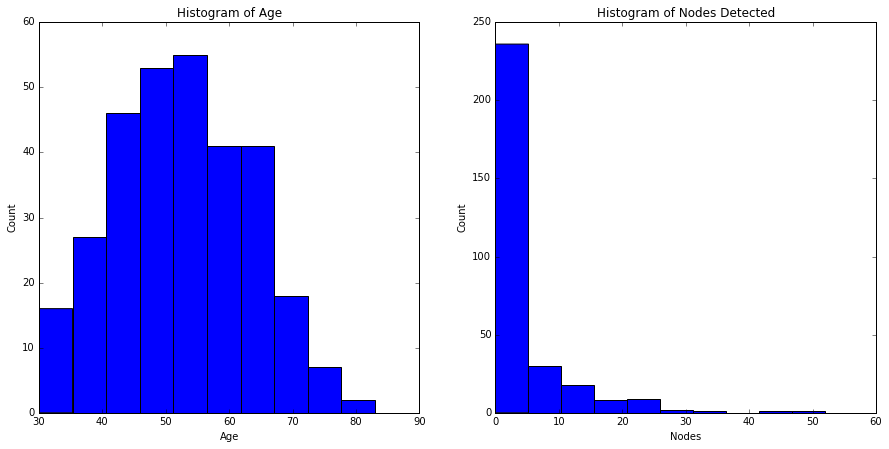

In [430]:
f, axarr = plt.subplots(1,2,figsize=(15,7));
axarr[0].hist(data.Age);
axarr[0].set_title('Histogram of Age')
axarr[0].set_ylabel('Count')
axarr[0].set_xlabel('Age')
axarr[1].hist(data.Nodes);
axarr[1].set_title('Histogram of Nodes Detected')
axarr[1].set_ylabel('Count')
axarr[1].set_xlabel('Nodes');

Earliest Year of Surgery:

In [431]:
data.Year.min()

58

Most Recent Surgery:

In [432]:
data.Year.max()

69

In [433]:
cross_val_score(lgr,data.values[:,[0,1,2]],data.values[:,3],
                cv=ShuffleSplit(len(y), n_iter=7, test_size=0.25,random_state=4444)).mean()

0.73714285714285721

In [434]:
lgr.fit(data.values[:,[0,1,2]],data.values[:,3]).coef_.tolist()

[[0.018546889125850386, -0.034545797986846594, 0.08812314047451096]]

These coefficients have the following interpretation:
    * The older you are, the less likely you are to survive 5 years (more likely your status is 2)
    * The bigger the Year variable (the more recent the surgery), the less likely you are to die within five year (this is a positive result)
    * Finally the more axillary nodes detected, the less likely you are to survive.

In [435]:
train_sizes_abs,train_scores,test_scores = learning_curve(lgr,data.values[:,[0,1,2]],data.values[:,3]
                                                          ,train_sizes=np.linspace(.1,1,20), 
                                                          cv=None, scoring=None)

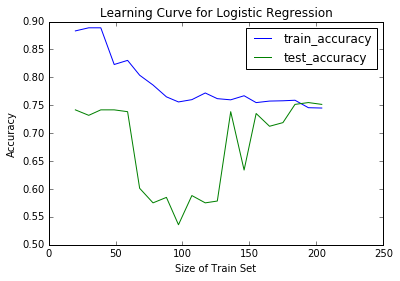

In [436]:
plt.plot(train_sizes_abs,train_scores.mean(1),label='train_accuracy')
plt.plot(train_sizes_abs,test_scores.mean(1),label='test_accuracy');
plt.xlabel('Size of Train Set')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend();